### Decrição do problema

A Dim Dim obtêm uma de suas receitas a partir de empréstimos. Mas muitas vezes o emprestimo está associado a um risco. 

O solicitante pode inadimplir o empréstimo e gerar prejuízo. Para mitigar esse problema, foi solicitado o uso de Machine Learning que pretende reduzir os impactos financeiros a partir de empréstimos.

## Dicinário dos dados

* ID = ID do cliente do requerente
* year = Ano de aplicação
* loan limit = montante máximo disponível do empréstimo que pode ser tomado
* Gender = tipo de sexo
* approv_in_adv = O empréstimo é pré-aprovado ou não
* loan_type = Tipo de empréstimo
* loan_purpose = a razão pela qual você quer pedir dinheiro emprestado
* Credit_Worthiness = Como um credor determina que você será inadimplente em suas obrigações de dívida ou como você merece receber um novo crédito.
* open_credit = É um empréstimo pré-aprovado entre um credor e um mutuário. Ele permite que o mutuário faça saques repetidos até um certo limite.
* business_or_commercial = Tipo de uso do valor do empréstimo
* loan_amount = O valor exato do empréstimo
* rate_of_interest = É o valor que um credor cobra de um mutuário e é uma porcentagem do principal - o valor emprestado.
* Interest_rate_spread = A diferença entre a taxa de juros que uma instituição financeira paga aos depositantes e a taxa de juros que recebe de empréstimos
* Upfront_charges = Taxa paga a um credor por um mutuário como contrapartida por fazer um novo empréstimo
* term = O período de amortização do empréstimo
* Neg_ammortization = Refere-se a uma situação em que um tomador de empréstimo faz um pagamento menor do que a parcela padrão definida pelo banco.
* interest_only = Quantidade de juros apenas sem princípios
* lump_sum_payment = É uma quantia de dinheiro que é paga em um único pagamento em vez de ser em parcelas.
* property_value = o valor presente dos benefícios futuros decorrentes da propriedade
* construction_type = Tipo de construção colateral
* occupancy_type = Classificações referem-se a estruturas de categorização com base em seu uso
* Secured_by = Tipo de Garantia segura
* total_units = número de unidades
* income = Refere-se à quantidade de dinheiro, propriedade e outras transferências de valor recebidas durante um determinado período de tempo
* credit_type = Tipo de crédito
* co-applicant_credit_type = É uma pessoa adicional envolvida no processo de solicitação de empréstimo. Tanto o requerente quanto o co-requerente solicitam e assinam o empréstimo
* age = idade do requerente
* submission_of_application = Verifica se a aplicação está completa ou não
* LTV = o valor do tempo de vida é um prognóstico do lucro líquido
* Region = Local do requerente
* Security_Type = Tipo de Garantia
* status = Status do empréstimo (aprovado/recusado)
* dtir1 = Relação dívida/renda

In [4]:
#@title Autenticação GCP
from google.colab import auth
auth.authenticate_user()
print('Authenticated')

Authenticated


In [9]:
#@title Importação das bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from google.cloud import bigquery
from google.colab import auth
from google.cloud import bigquery
from google.colab import data_table

In [10]:
#@title Tamanho da figura 
sns.set(rc={'figure.figsize': [10, 10]}, font_scale=1.3)

In [11]:
#@title Id do projeto e localização dos dados.
PROJECT = 'fiap2-368122' #@param {type:"string"}
LOCATION = 'US' #@param {type:"string"}

In [12]:
#@title Configuração para leitura dos dados
client = bigquery.Client(project=PROJECT, location=LOCATION)
data_table.enable_dataframe_formatter()
auth.authenticate_user()

## ID do Job no bigquery

Para obter esses dados você precisa obter o id de execução desta maneira:

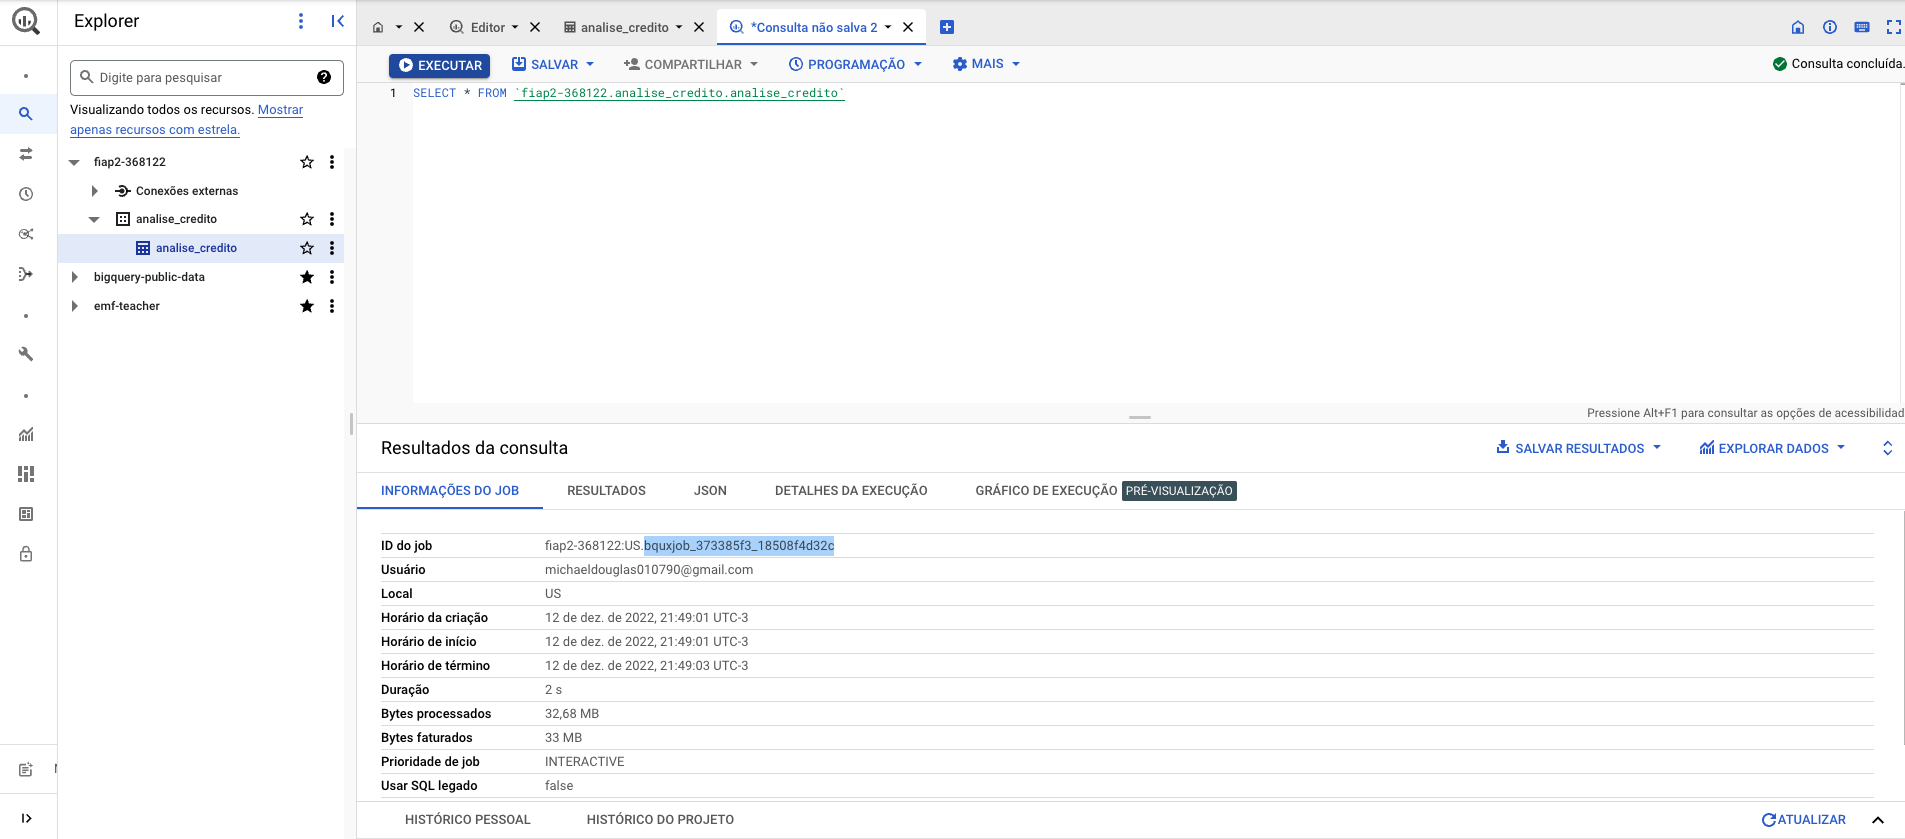

In [14]:
#Inserir o id do job como parâmetro
JOBID = 'bquxjob_373385f3_18508f4d32c' #@param {type:"string"}

In [16]:
job = client.get_job(JOBID)
job.query

'SELECT * FROM `fiap2-368122.analise_credito.analise_credito`'

In [30]:
job = client.get_job(JOBID)
result = job.to_dataframe()

In [36]:
#@title Cópia de segurança do dataframe
df = result

In [37]:
#@title Dataframe dos dados
df.head(5)

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,Neg_ammortization,interest_only,lump_sum_payment,property_value,construction_type,occupancy_type,Secured_by,total_units,income,credit_type,Credit_Score,co_applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,26197,2019,cf,Male,nopre,type1,p3,l1,nopc,nob/c,256500,NaN,NaN,NaN,360.0,not_neg,not_int,lpsm,NaN,sb,pr,home,1U,3060.0,EQUI,671,EXP,>74,to_inst,NaN,south,direct,1,NaN
1,27122,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,436500,NaN,NaN,NaN,360.0,not_neg,not_int,not_lpsm,NaN,sb,pr,home,1U,9660.0,EQUI,687,EXP,35-44,not_inst,NaN,North,direct,1,NaN
2,27175,2019,cf,Male,nopre,type1,p1,l1,nopc,nob/c,236500,NaN,NaN,NaN,360.0,neg_amm,not_int,not_lpsm,NaN,sb,pr,home,1U,3720.0,EQUI,784,EXP,35-44,not_inst,NaN,North,direct,1,NaN
3,27881,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,36500,NaN,NaN,NaN,360.0,neg_amm,not_int,not_lpsm,NaN,sb,pr,home,2U,7020.0,EQUI,836,EXP,45-54,to_inst,NaN,North,direct,1,NaN
4,28651,2019,cf,Male,nopre,type3,p3,l1,nopc,nob/c,236500,NaN,NaN,NaN,360.0,not_neg,not_int,not_lpsm,NaN,sb,pr,home,1U,3600.0,EQUI,803,EXP,35-44,to_inst,NaN,south,direct,1,NaN


In [38]:
#@title Dimensionalidade dos dados - Linhas/Colunas
df.shape

(148670, 34)

In [39]:
#@title Colunas do dataframe
df.columns

Index(['ID', 'year', 'loan_limit', 'Gender', 'approv_in_adv', 'loan_type',
       'loan_purpose', 'Credit_Worthiness', 'open_credit',
       'business_or_commercial', 'loan_amount', 'rate_of_interest',
       'Interest_rate_spread', 'Upfront_charges', 'term', 'Neg_ammortization',
       'interest_only', 'lump_sum_payment', 'property_value',
       'construction_type', 'occupancy_type', 'Secured_by', 'total_units',
       'income', 'credit_type', 'Credit_Score', 'co_applicant_credit_type',
       'age', 'submission_of_application', 'LTV', 'Region', 'Security_Type',
       'Status', 'dtir1'],
      dtype='object')

In [40]:
#@title Conversão das colunas para minúsculas 
df.columns= df.columns.str.lower()

In [41]:
df.columns

Index(['id', 'year', 'loan_limit', 'gender', 'approv_in_adv', 'loan_type',
       'loan_purpose', 'credit_worthiness', 'open_credit',
       'business_or_commercial', 'loan_amount', 'rate_of_interest',
       'interest_rate_spread', 'upfront_charges', 'term', 'neg_ammortization',
       'interest_only', 'lump_sum_payment', 'property_value',
       'construction_type', 'occupancy_type', 'secured_by', 'total_units',
       'income', 'credit_type', 'credit_score', 'co_applicant_credit_type',
       'age', 'submission_of_application', 'ltv', 'region', 'security_type',
       'status', 'dtir1'],
      dtype='object')